In [6]:
!pip install ppscore

In [42]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,minmax_scale,OneHotEncoder,LabelEncoder
import ppscore as pps
from sklearn.ensemble import IsolationForest

# 1. Data Exploration and Preprocessing:

In [8]:
df=pd.read_csv("adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [11]:
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


In [12]:
df.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


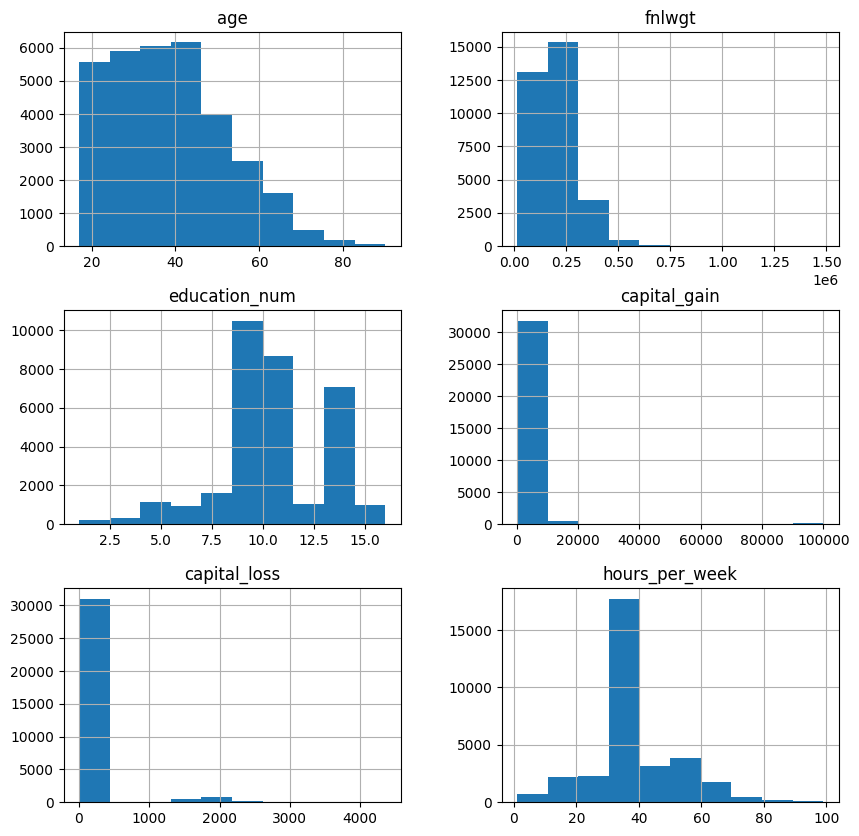

In [13]:
df.hist(figsize=(10,10))
plt.show()

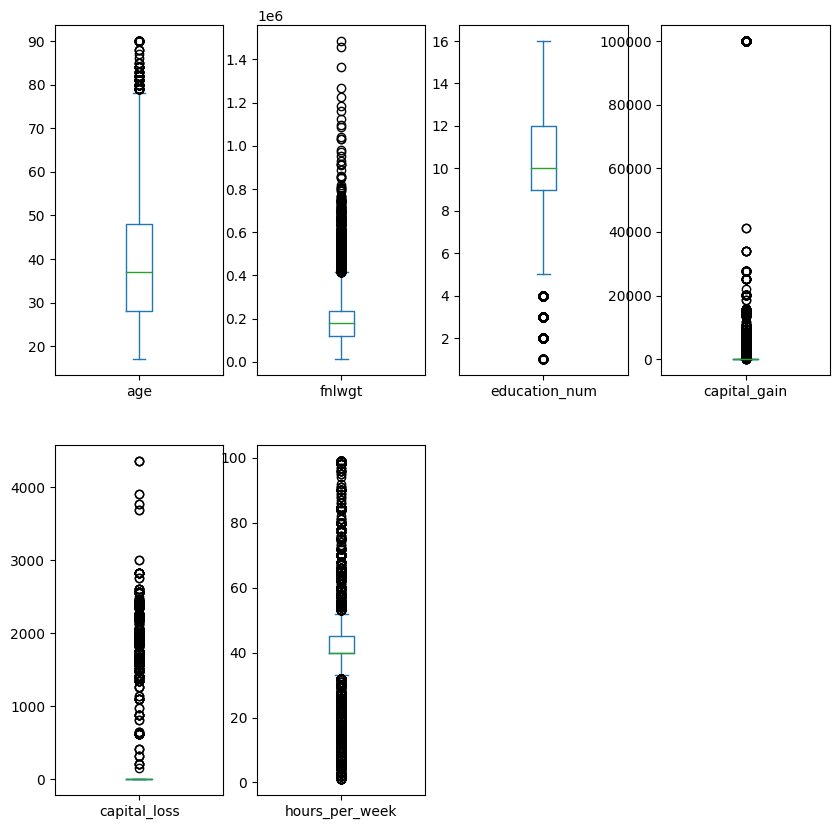

In [14]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(10,10))
plt.show()

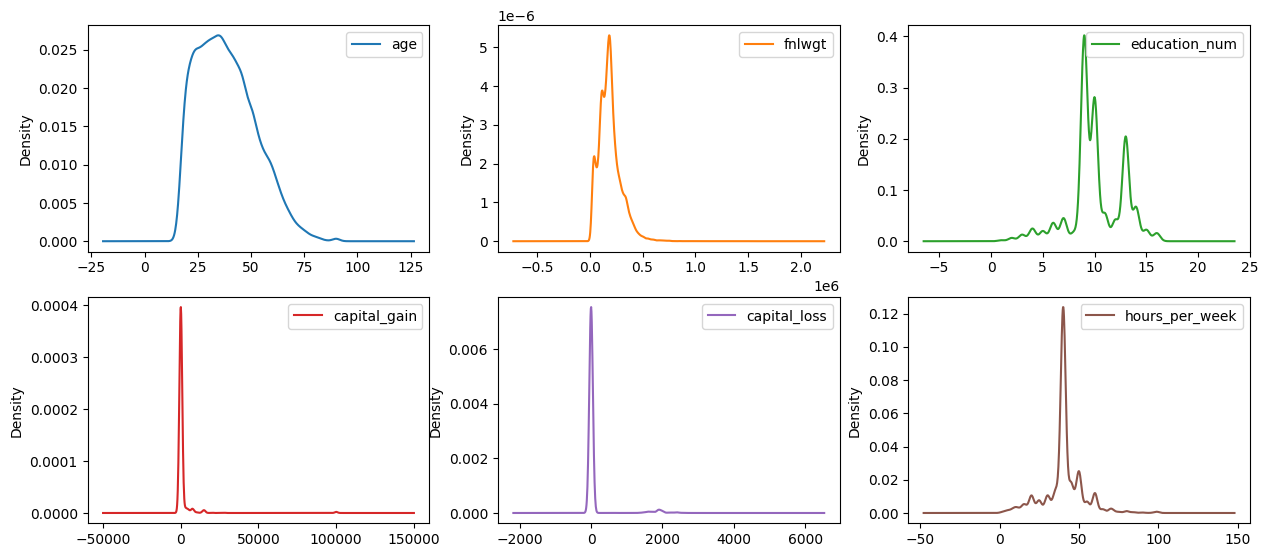

In [15]:
#density plot
df.plot(kind='density',subplots=True,layout=(3,3),figsize=(15,10),sharex=False)
plt.show()

In [16]:
corr = df.select_dtypes(include='number').corr()
corr

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education_num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital_gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital_loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours_per_week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


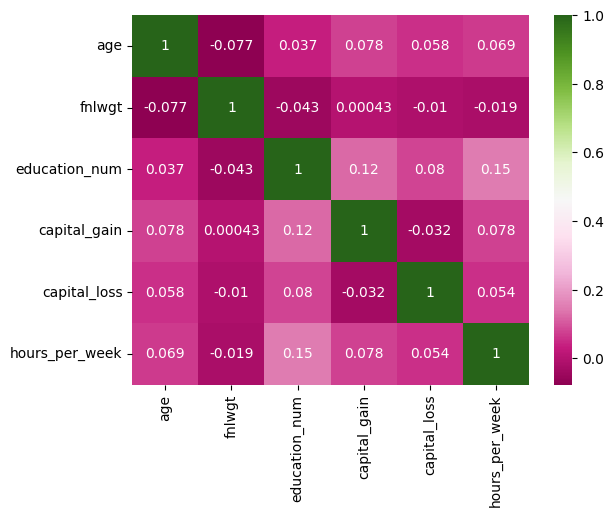

In [17]:
sns.heatmap(corr,annot=True,cmap='PiYG')
plt.show()

In [18]:
numerical_columns=df.select_dtypes(include='number').columns
numerical_columns

Index(['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [19]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
categorical_features

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country',
 'income']

In [20]:
standardScaler=StandardScaler()
df[numerical_columns]=standardScaler.fit_transform(df[numerical_columns])
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,Private,0.639741,Assoc-acdm,0.746039,Married-civ-spouse,Tech-support,Wife,White,Female,-0.145920,-0.21666,-0.197409,United-States,<=50K
32557,0.103983,Private,-0.335433,HS-grad,-0.420060,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,-0.145920,-0.21666,-0.035429,United-States,>50K
32558,1.423610,Private,-0.358777,HS-grad,-0.420060,Widowed,Adm-clerical,Unmarried,White,Female,-0.145920,-0.21666,-0.035429,United-States,<=50K
32559,-1.215643,Private,0.110960,HS-grad,-0.420060,Never-married,Adm-clerical,Own-child,White,Male,-0.145920,-0.21666,-1.655225,United-States,<=50K


In [21]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [22]:
numerical_columns_norm = df.select_dtypes(include='number').columns
df[numerical_columns_norm] = df[numerical_columns_norm].apply(norm_func)
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.301370,State-gov,0.044302,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.021740,0.0,0.397959,United-States,<=50K
1,0.452055,Self-emp-not-inc,0.048238,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States,<=50K
2,0.287671,Private,0.138113,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States,<=50K
3,0.493151,Private,0.151068,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States,<=50K
4,0.150685,Private,0.221488,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0.136986,Private,0.166404,Assoc-acdm,0.733333,Married-civ-spouse,Tech-support,Wife,White,Female,0.000000,0.0,0.377551,United-States,<=50K
32557,0.315068,Private,0.096500,HS-grad,0.533333,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.000000,0.0,0.397959,United-States,>50K
32558,0.561644,Private,0.094827,HS-grad,0.533333,Widowed,Adm-clerical,Unmarried,White,Female,0.000000,0.0,0.397959,United-States,<=50K
32559,0.068493,Private,0.128499,HS-grad,0.533333,Never-married,Adm-clerical,Own-child,White,Male,0.000000,0.0,0.193878,United-States,<=50K


**•	Discuss the scenarios where each scaling technique is preferred and why.**

1.   Standard Scaling is preferred when the data follows a normal distribution, as it centers the data around 0 with a standard deviation of 1.
Min-Max Scaling is used when the data
2.   Min-Max Scaling is used when the data does not necessarily follow a normal distribution and you want to normalize the data to a specific range (typically 0 to 1).

# 2. Encoding Techniques:

In [23]:
# One-Hot Encoding for categorical variables with fewer than 5 categories
categorical_features_less_5 = [col for col in categorical_features if df[col].nunique() < 5]
df_one_hot_encoded = pd.get_dummies(df[categorical_features_less_5], drop_first=True)

In [24]:
# Label Encoding for categorical variables with more than 5 categories
categorical_features_more_5 = [col for col in categorical_features if df[col].nunique() >= 5]
label_encoder = LabelEncoder()
for col in categorical_features_more_5:
    df[col] = label_encoder.fit_transform(df[col])

In [25]:
# Display one hot encoded
print("one hot encoded ")
df_one_hot_encoded

one hot encoded 


,sex_ Male,income_ >50K
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
32556,0,0
32557,1,1
32558,0,0
32559,1,0


In [26]:
# Display Label Encoding
print("Label Encoding head:")
df[categorical_features_more_5]

Label Encoding head:


,workclass,education,marital_status,occupation,relationship,race,native_country
0,7,9,4,1,1,4,39
1,6,9,2,4,0,4,39
2,4,11,0,6,1,4,39
3,4,1,2,6,0,2,39
4,4,9,2,10,5,2,5
...,...,...,...,...,...,...,...
32556,4,7,2,13,5,4,39
32557,4,11,2,7,0,4,39
32558,4,11,6,1,4,4,39
32559,4,11,4,1,3,4,39


**•	Discuss the pros and cons of One-Hot Encoding and Label Encoding.**

1.   One-Hot Encoding is advantageous because it does not assume any ordinal relationship between categories but can lead to a high-dimensional dataset.
2.   Label Encoding is more space-efficient but introduces an ordinal relationship between the categories, which might not be appropriate for non-ordinal data.



# 3. Feature Engineering:

In [27]:
# Create new features
df['age_group'] = pd.cut(df['age'], bins=[0, 25, 45, 65, 100], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

df['education_hours'] = df['education_num'] * df['hours_per_week']

In [28]:
# Log Transformation on a skewed numerical feature
df['log_capital_gain'] = df['capital_gain'].apply(lambda x: np.log1p(x))

In [29]:
# Display the new featuresd
df[['age_group', 'education_hours', 'log_capital_gain']]

,age_group,education_hours,log_capital_gain
0,Young,0.318367,0.021507
1,Young,0.097959,0.000000
2,Young,0.212245,0.000000
3,Young,0.159184,0.000000
4,Young,0.318367,0.000000
...,...,...,...
32556,Young,0.276871,0.000000
32557,Young,0.212245,0.000000
32558,Young,0.212245,0.000000
32559,Young,0.103401,0.000000


# 4. Feature Selection:

In [37]:
# Isolation Forest to identify and remove outliers
iso_forest = IsolationForest(contamination=0.01,random_state=42)
df['outliers'] = iso_forest.fit_predict(df[numerical_columns])
df_cleaned = df[df['outliers'] == 1]  # Keep non-outliers

# Display the cleaned data
df_cleaned

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,outliers
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,1
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,1
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,1


In [40]:
# Correlation matrix for comparison
import warnings
warnings.filterwarnings('ignore')
corr_matrix = df_cleaned.corr()
corr_matrix

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,outliers
age,1.000000,-0.077302,0.031440,0.108184,0.040729,0.071138,NaN
fnlwgt,-0.077302,1.000000,-0.043846,-0.008207,-0.013248,-0.021618,NaN
education_num,0.031440,-0.043846,1.000000,0.141995,0.078918,0.144119,NaN
capital_gain,0.108184,-0.008207,0.141995,1.000000,-0.047679,0.082815,NaN
capital_loss,0.040729,-0.013248,0.078918,-0.047679,1.000000,0.045678,NaN
hours_per_week,0.071138,-0.021618,0.144119,0.082815,0.045678,1.000000,NaN
outliers,NaN,NaN,NaN,NaN,NaN,NaN,NaN


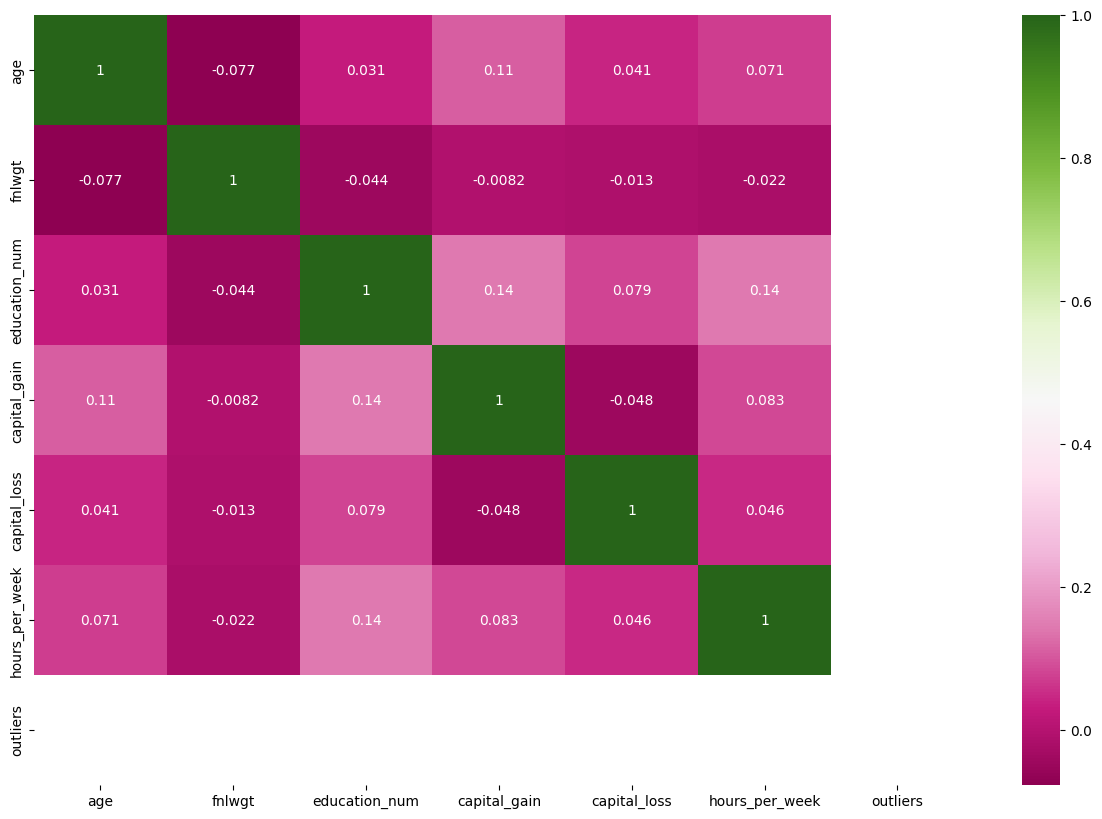

In [55]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='PiYG')
plt.show()

In [39]:
# PPS (Predictive Power Score) to find and discuss relationships between features
pps_matrix = pps.matrix(df_cleaned)
pps_matrix

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000e+00,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,1.599805e-02,classification,True,weighted F1,0.572812,0.579646,DecisionTreeClassifier()
2,age,fnlwgt,0.000000e+00,regression,True,mean absolute error,77515.117800,78903.943015,DecisionTreeRegressor()
3,age,education,5.399427e-02,classification,True,weighted F1,0.193600,0.237141,DecisionTreeClassifier()
4,age,education_num,0.000000e+00,regression,True,mean absolute error,1.876000,1.913453,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
251,outliers,capital_loss,0.000000e+00,regression,True,mean absolute error,86.651600,165.242874,DecisionTreeRegressor()
252,outliers,hours_per_week,0.000000e+00,regression,True,mean absolute error,7.359200,7.499970,DecisionTreeRegressor()
253,outliers,native_country,2.240396e-07,classification,True,weighted F1,0.841947,0.841947,DecisionTreeClassifier()
254,outliers,income,0.000000e+00,classification,True,weighted F1,0.654198,0.654198,DecisionTreeClassifier()


In [45]:
pps.score(df, "age", "hours_per_week")

{'x': 'age',
 'y': 'hours_per_week',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 7.6564,
 'model_score': 8.129102125681404,
 'model': DecisionTreeRegressor()}

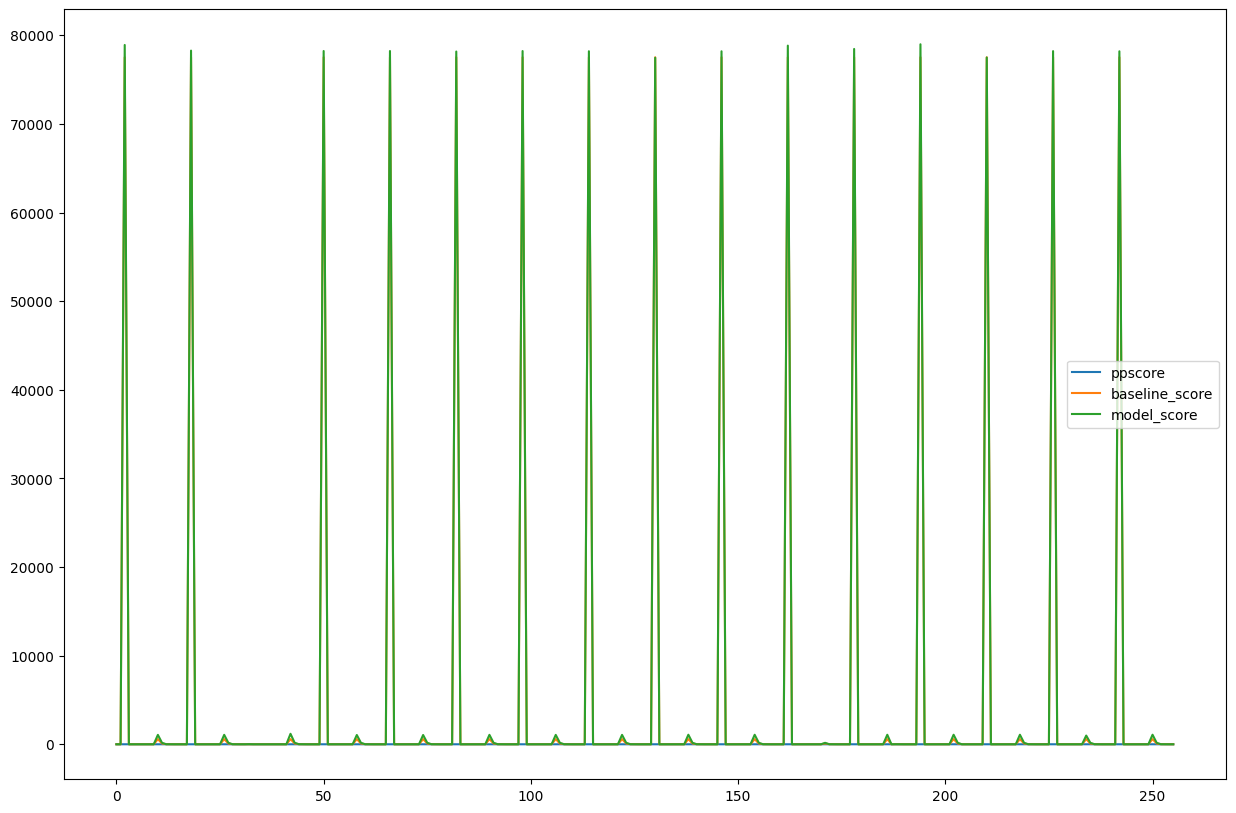

In [51]:
# Assuming pps_matrix is already calculated
pps.matrix(df_cleaned).plot(figsize=(15,10))  # Use the plot method from pps
plt.show()